In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.inspection import plot_partial_dependence
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy import feature as cfeature

In [2]:
lookup_df = pd.read_pickle('lookup_20190801_df.pkl')
lookup_df

,metar_gust,hrrr_gust,metar_coords,hrrr_coords_lon,hrrr_coords_lat,hrrr_temp,hrrr_windu,hrrr_windv,hrrr_wind_speed,hrrr_precip_rate
0,0.0,6.42368,"(-110.85, 31.42)",-110.858,31.424,297.571167,-5.548723,-3.178455,6.248435,0.0
1,0.0,6.36118,"(-110.96, 32.13)",-110.951,32.144,297.571167,-5.486223,-3.240955,6.248435,0.0
2,0.0,6.36118,"(-111.17, 32.14)",-111.175,32.143,297.571167,-5.361223,-3.303455,6.185935,0.0
3,0.0,6.29868,"(-111.21, 32.4)",-111.222,32.408,297.571167,-5.298723,-3.303455,6.123435,0.0
4,0.0,6.23618,"(-116.98, 32.57)",-116.979,32.559,297.508667,-5.236223,-3.365955,6.060935,0.0
...,...,...,...,...,...,...,...,...,...,...
495,0.0,2.67368,"(-112.52, 39.38)",-112.511,39.388,302.571167,-1.611223,2.071545,2.685935,0.0
496,0.0,2.67368,"(-116.0, 39.6)",-116.010,39.604,302.571167,-1.486223,2.134045,2.685935,0.0
497,0.0,2.54868,"(-119.88, 39.65)",-119.867,39.652,302.571167,-1.298723,2.134045,2.560935,0.0
498,0.0,2.48618,"(-120.57, 40.38)",-120.577,40.377,302.571167,-1.173723,2.196545,2.498435,0.0


In [4]:
array = lookup_df.values
X = array[:, 2:9]
y = array[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


scaler = StandardScaler()
rescaled_X_train = (scaler.fit_transform(X_train[:, 5:9])) # doesn't include lon, latb
rescaled_X_test = (scaler.fit_transform(X_test[:, 5:9])) # doesn't include lon, lat

### Training the neural net
Puts strain on the computer, is there a better way? 

In [5]:
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam',
                   alpha=0.0001, batch_size='auto', learning_rate='adaptive', learning_rate_init=0.001,
                   power_t=0.5, max_iter=1500, shuffle=True, random_state=None, tol=0.0001, verbose=False,
                   warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False,
                   validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
mlp = mlp.fit(rescaled_X_train, y_train)

### Run neural net

In [6]:
y_predict_mlp = mlp.predict(rescaled_X_test)

### Plot neural net

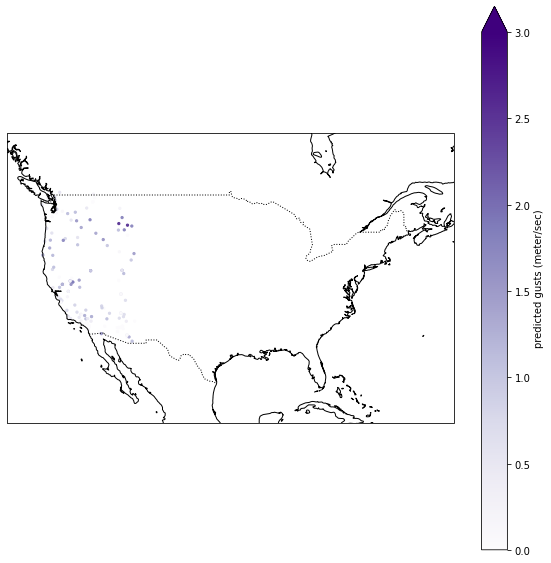

In [9]:
fig = plt.figure(figsize=(10, 10), facecolor='w')
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
ax.set_extent([-130, -60, 20, 55], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

plt.scatter(X_test[:, 1], X_test[:, 2], c=y_predict_mlp, cmap='Purples',
          vmin=0, vmax=3, s=5, transform=ccrs.PlateCarree())

plt.colorbar(label='predicted gusts (meter/sec)', extend='max')
plt.show()

### Plot training set

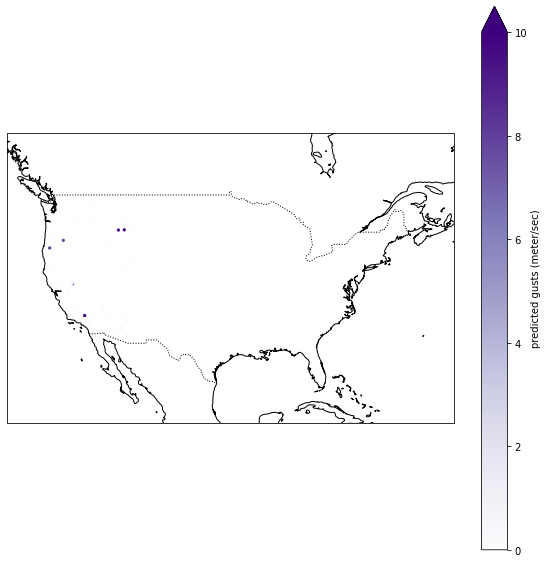

In [13]:
fig = plt.figure(figsize=(10, 10), facecolor='w')
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
ax.set_extent([-130, -60, 20, 55], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

plt.scatter(X_test[:, 1], X_test[:, 2], c=y_test, cmap='Purples',
          vmin=0, vmax=10, s=5, transform=ccrs.PlateCarree())

plt.colorbar(label='predicted gusts (meter/sec)', extend='max')
plt.show()